# Image Segmentation
<b>Finding major colors</b>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import rcParams

(1440, 1920, 3)


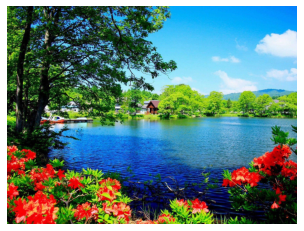

In [2]:
# bunch = plt.imread("bunch_flower.jpg")
bunch = plt.imread("lake.jpg")
print(bunch.shape)
plt.axis("off")
plt.imshow(bunch)

In [4]:
bunch

array([[[ 40,  38,  17],
        [ 27,  31,   6],
        [ 18,  33,   2],
        ...,
        [  1, 127, 250],
        [  0, 126, 249],
        [  0, 125, 248]],

       [[ 38,  42,   7],
        [ 37,  47,  10],
        [ 46,  68,  22],
        ...,
        [  1, 127, 250],
        [  1, 127, 250],
        [  0, 126, 249]],

       [[ 69,  87,  25],
        [ 68,  90,  25],
        [ 94, 125,  55],
        ...,
        [  2, 128, 251],
        [  2, 128, 251],
        [  2, 128, 251]],

       ...,

       [[ 69, 142,  27],
        [ 63, 137,  24],
        [ 49, 125,  16],
        ...,
        [  2,  23,   4],
        [  1,  25,   3],
        [  0,  26,   1]],

       [[ 50, 123,  18],
        [ 51, 126,  23],
        [ 42, 118,  18],
        ...,
        [  0,  12,   1],
        [  0,  15,   0],
        [  0,  17,   0]],

       [[ 39, 113,  14],
        [ 47, 123,  25],
        [ 43, 118,  25],
        ...,
        [  0,  12,   3],
        [  1,  17,   6],
        [  4,  22,   8]]

### Black and White image

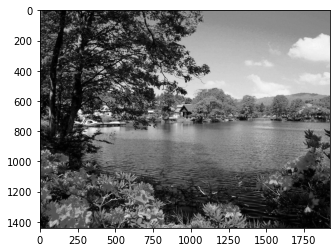

In [3]:
bw = bunch.mean(axis=2)/255.0

plt.imshow(bw, cmap='gray')

In [6]:
data = np.array(bunch)
data = data/255.0

In [7]:
from   sklearn.model_selection import train_test_split                                # To split the dataset
from   sklearn.cluster import KMeans, MiniBatchKMeans                                 # K-means algorithm
from   sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # To measure the model performance

### Data restructure for model training

In [8]:
X = data.copy()
X = X.reshape(-1,3)

In [9]:
X

array([[0.15686275, 0.14901961, 0.06666667],
       [0.10588235, 0.12156863, 0.02352941],
       [0.07058824, 0.12941176, 0.00784314],
       ...,
       [0.        , 0.04705882, 0.01176471],
       [0.00392157, 0.06666667, 0.02352941],
       [0.01568627, 0.08627451, 0.03137255]])

In [10]:
X.shape

(2764800, 3)

### Finding major colors

In [11]:
K = 6   # Major colors
model = KMeans(n_clusters = K, random_state = 10)
model.fit(X)

KMeans(n_clusters=6, random_state=10)

### Major Colors

In [12]:
model.cluster_centers_

array([[0.07100372, 0.15296522, 0.08229739],
       [0.19577319, 0.63023369, 0.87839604],
       [0.63282453, 0.85457876, 0.93860292],
       [0.52223514, 0.67301039, 0.23060565],
       [0.83221503, 0.14188255, 0.09526797],
       [0.15121137, 0.33505422, 0.5331442 ]])

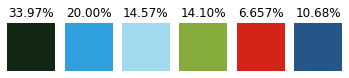

In [13]:
i = 0
colors = []
no_cells = X.shape[0]

for col in (model.cluster_centers_):
    majorColor = np.zeros((100,100,3))
    col = np.array(col).reshape(1,1,3)
    majorColor = col
    
    colors.append(col)
    
    plt.subplot(100+10*K+1+i)
    plt.axis("off")
    
   
    plt.imshow(majorColor)
    
    pct = (list(model.labels_).count(i) / no_cells)*100
    plt.title(str(pct)[0:5]+'%')
    
    i += 1

color_org = colors.copy()

# Original Image

(-0.5, 1919.5, 1439.5, -0.5)

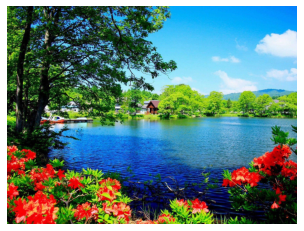

In [14]:
plt.imshow(bunch)
plt.axis("off")

# Segmented Image

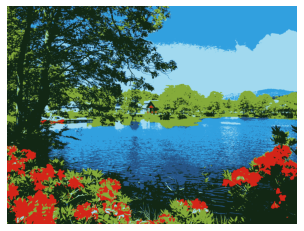

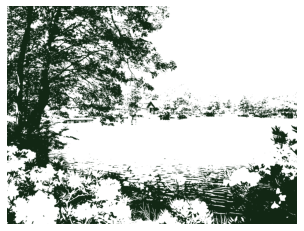

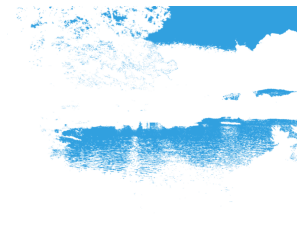

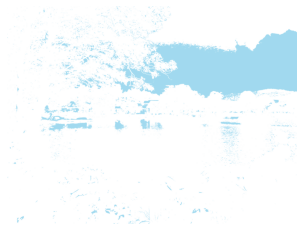

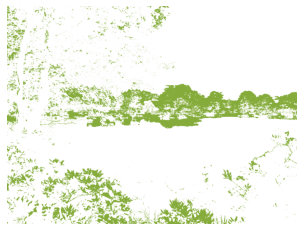

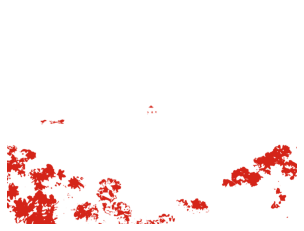

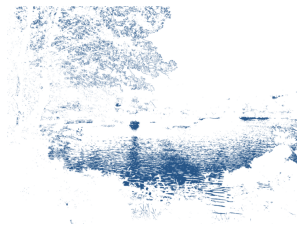

In [15]:
def show_segment(colors):
    new_bunch = X.copy()
    for j in range(X.shape[0]):
        new_bunch[j] = colors[model.labels_[j]]
    new_bunch = new_bunch.reshape(data.shape)

    plt.imshow(new_bunch)
    plt.axis("off")
    plt.show()
    return

# Main program

colors = color_org.copy()
show_segment(colors)

white = np.array([[[1.0,1.0,1.0]]])
black = np.array([[[0.0,0.0,0.0]]])

for i in range(len(model.cluster_centers_)):
    
    colors = color_org.copy()
    
    for j in range(len(model.cluster_centers_)):
        
        if i == j :
            pass
        else:
            colors[j] = white
            
    show_segment(colors)
    
#plt.imshow(data)